In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
# import numpy as np
# print(np.__version__)

In [3]:
#!pip3 install xgboost --upgrade

In [4]:
# !pip3 install numpy --upgrade


In [5]:
# !pip install --upgrade numpy
# !pip install --upgrade pandas

In [6]:
df=pd.read_csv('AEP_hourly.csv')
df = df.set_index('Datetime')

In [7]:
df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


In [8]:
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [9]:
df.tail()

,AEP_MW
Datetime,
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0
2018-01-01 23:00:00,20415.0
2018-01-02 00:00:00,19993.0


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9+ MB


In [11]:
#set index datetime as column
df.index = pd.to_datetime(df.index)

In [12]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


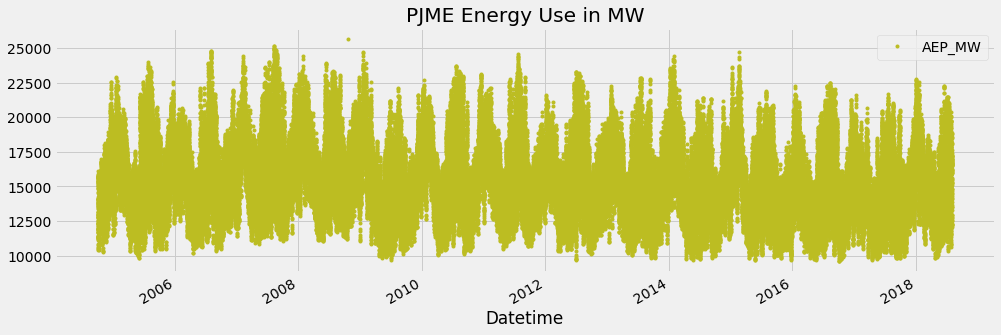

In [13]:
df.plot(style='.',figsize=(15, 5),color=color_pal[8],title='PJME Energy Use in MW')
plt.show()

## Train / Test Split

In [14]:
df.index<'01-01-2015'

array([ True,  True,  True, ..., False, False, False])

In [15]:
df.index>='01-01-2015'

array([False, False, False, ...,  True,  True,  True])

In [16]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']


In [17]:
train

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2014-01-01 20:00:00,16433.0
2014-01-01 21:00:00,16376.0
2014-01-01 22:00:00,16151.0


In [18]:
test

,AEP_MW
Datetime,
2015-01-01 00:00:00,16375.0
2015-12-31 01:00:00,12415.0
2015-12-31 02:00:00,12087.0
2015-12-31 03:00:00,12010.0
2015-12-31 04:00:00,11972.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


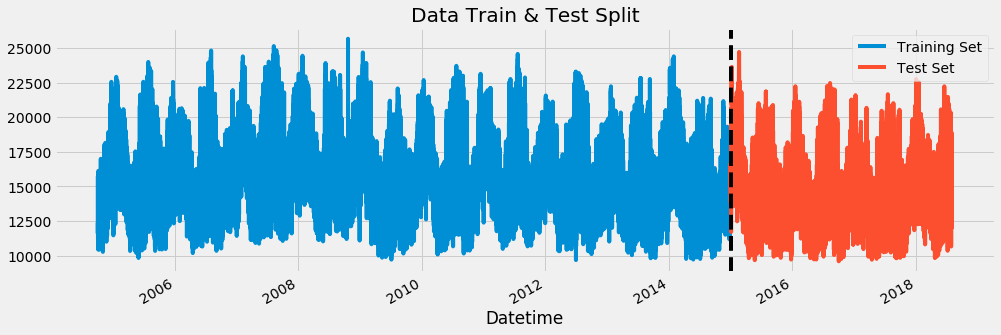

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train & Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

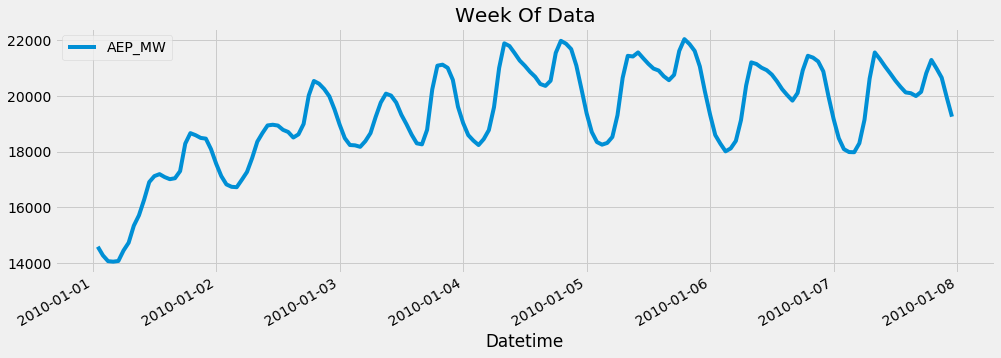

In [20]:
# Sample of 1st Week of 2010 to analysize data
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()


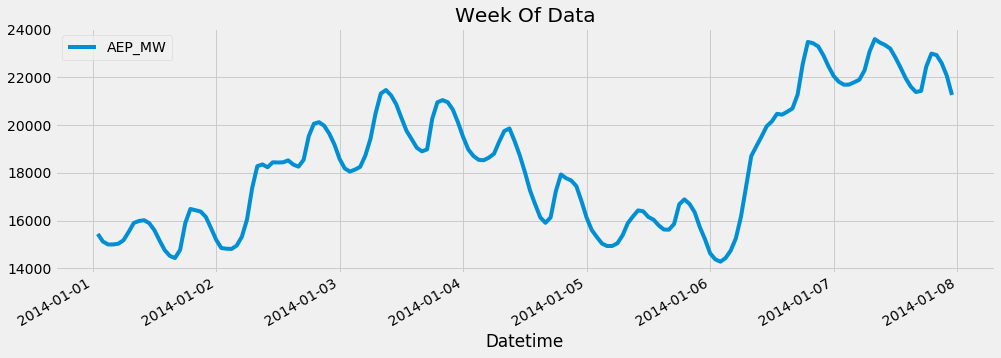

In [21]:
# Sample of 1st Week of 2014 to analysize data
df.loc[(df.index > '01-01-2014') & (df.index < '01-08-2014')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()


# Feature Selection

In [22]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
# Monday=0 & Sunday=6

In [23]:
df['hour']

Datetime
2004-12-31 01:00:00     1
2004-12-31 02:00:00     2
2004-12-31 03:00:00     3
2004-12-31 04:00:00     4
2004-12-31 05:00:00     5
                       ..
2018-01-01 20:00:00    20
2018-01-01 21:00:00    21
2018-01-01 22:00:00    22
2018-01-01 23:00:00    23
2018-01-02 00:00:00     0
Name: hour, Length: 121273, dtype: int64

In [24]:
df.index.hour

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            15, 16, 17, 18, 19, 20, 21, 22, 23,  0],
           dtype='int64', name='Datetime', length=121273)

In [25]:

df.index.dayofweek

Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
           dtype='int64', name='Datetime', length=121273)

In [26]:
df

,AEP_MW,hour,dayofweek
Datetime,,,
2004-12-31 01:00:00,13478.0,1,4
2004-12-31 02:00:00,12865.0,2,4
2004-12-31 03:00:00,12577.0,3,4
2004-12-31 04:00:00,12517.0,4,4
2004-12-31 05:00:00,12670.0,5,4
...,...,...,...
2018-01-01 20:00:00,21089.0,20,0
2018-01-01 21:00:00,20999.0,21,0
2018-01-01 22:00:00,20820.0,22,0


In [27]:
 
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear
df['dayofmonth'] = df.index.day
df['weekofyear'] = df.index.isocalendar().week
   

In [28]:
df

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366,31,53
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366,31,53
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366,31,53
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366,31,53
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366,31,53
...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,20,0,1,1,2018,1,1,1
2018-01-01 21:00:00,20999.0,21,0,1,1,2018,1,1,1
2018-01-01 22:00:00,20820.0,22,0,1,1,2018,1,1,1


In [29]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [30]:
df

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366,31,53
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366,31,53
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366,31,53
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366,31,53
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366,31,53
...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,20,0,1,1,2018,1,1,1
2018-01-01 21:00:00,20999.0,21,0,1,1,2018,1,1,1
2018-01-01 22:00:00,20820.0,22,0,1,1,2018,1,1,1


## Visualize our Feature / Target Relationship¶


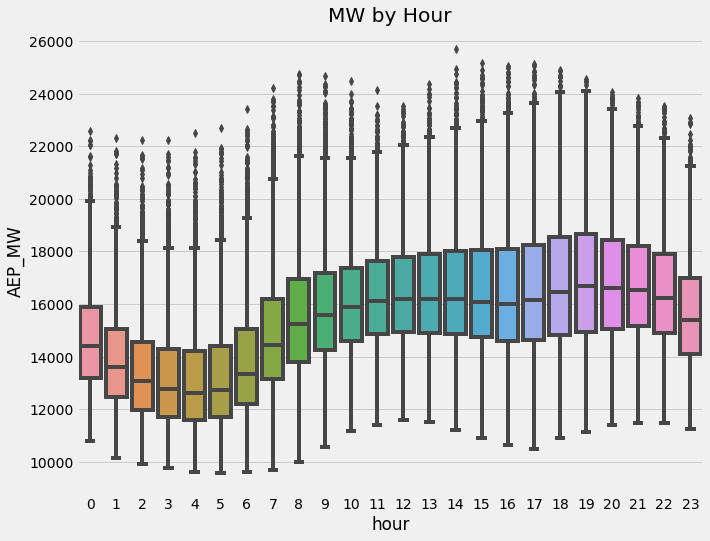

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='AEP_MW')
ax.set_title('MW by Hour')
plt.show()

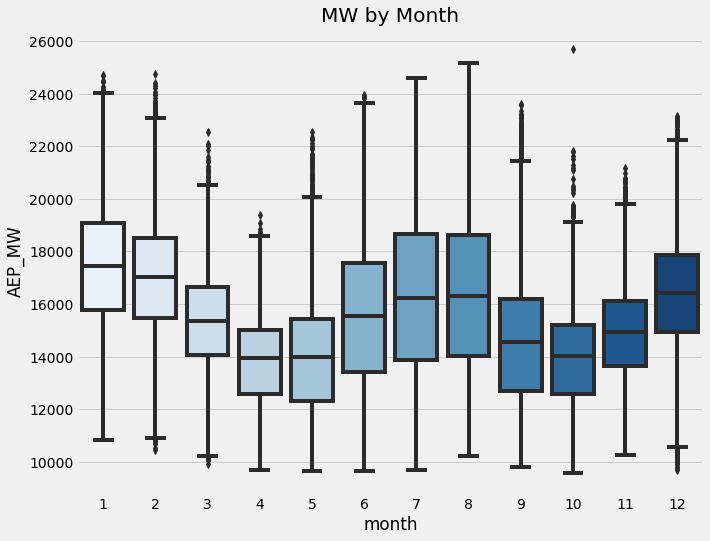

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='AEP_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()

## Create our Model¶


In [33]:
df.columns

Index(['AEP_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   AEP_MW      121273 non-null  float64
 1   hour        121273 non-null  int64  
 2   dayofweek   121273 non-null  int64  
 3   quarter     121273 non-null  int64  
 4   month       121273 non-null  int64  
 5   year        121273 non-null  int64  
 6   dayofyear   121273 non-null  int64  
 7   dayofmonth  121273 non-null  int64  
 8   weekofyear  121273 non-null  UInt32 
dtypes: UInt32(1), float64(1), int64(7)
memory usage: 8.9 MB


In [35]:
train = create_features(train)
test = create_features(test)

features = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'AEP_MW'

X_train = train[features]
y_train = train[TARGET]

X_test = test[features]
y_test = test[TARGET]

In [38]:
TARGET

'AEP_MW'

In [39]:
features

['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']

In [40]:
train

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366,31,53
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366,31,53
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366,31,53
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366,31,53
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366,31,53
...,...,...,...,...,...,...,...,...,...
2014-01-01 20:00:00,16433.0,20,2,1,1,2014,1,1,1
2014-01-01 21:00:00,16376.0,21,2,1,1,2014,1,1,1
2014-01-01 22:00:00,16151.0,22,2,1,1,2014,1,1,1


In [41]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[22:26:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:15793.26062	validation_1-rmse:14861.30187
[100]	validation_0-rmse:6033.90962	validation_1-rmse:5144.92812
[200]	validation_0-rmse:2702.85176	validation_1-rmse:2158.50791
[300]	validation_0-rmse:1754.98214	validation_1-rmse:1666.22808
[396]	validation_0-rmse:1521.45476	validation_1-rmse:1657.05964


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

## Features Importance

In [50]:
reg.feature_importances_

array([0.16079916, 0.32144487, 0.24672545, 0.04393599, 0.15742578,
       0.06966876], dtype=float32)

In [51]:
 index=reg.feature_names_in_

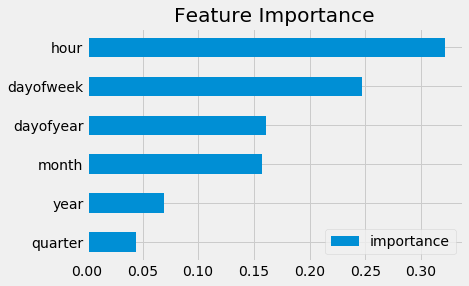

In [53]:
fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_,columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## Forecast on Test¶


In [55]:
reg.predict(X_test)

array([15540.084, 14707.504, 14360.377, ..., 17020.418, 16806.393,
       16016.921], dtype=float32)

In [63]:
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
df

C:\Users\MohamedAhmedMAHMOUD\anaconda3\lib\site-packages\pandas\core\frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'prediction_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,prediction_x,prediction_y,prediction_x,prediction_y,prediction_x,prediction_y,prediction_x,prediction_y
Datetime,,,,,,,,,,,,,,,,,
2004-10-01 01:00:00,12379.0,1,4,4,10,2004,275,1,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-01 02:00:00,11935.0,2,4,4,10,2004,275,1,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-01 03:00:00,11692.0,3,4,4,10,2004,275,1,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-01 04:00:00,11597.0,4,4,4,10,2004,275,1,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-01 05:00:00,11681.0,5,4,4,10,2004,275,1,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,17673.0,20,3,3,8,2018,214,2,31,17147.798828,17147.798828,17147.798828,17147.798828,17147.798828,17147.798828,17147.798828,17147.798828
2018-08-02 21:00:00,17303.0,21,3,3,8,2018,214,2,31,17147.798828,17147.798828,17147.798828,17147.798828,17147.798828,17147.798828,17147.798828,17147.798828
2018-08-02 22:00:00,17001.0,22,3,3,8,2018,214,2,31,17147.798828,17147.798828,17147.798828,17147.798828,17147.798828,17147.798828,17147.798828,17147.798828


C:\Users\MohamedAhmedMAHMOUD\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


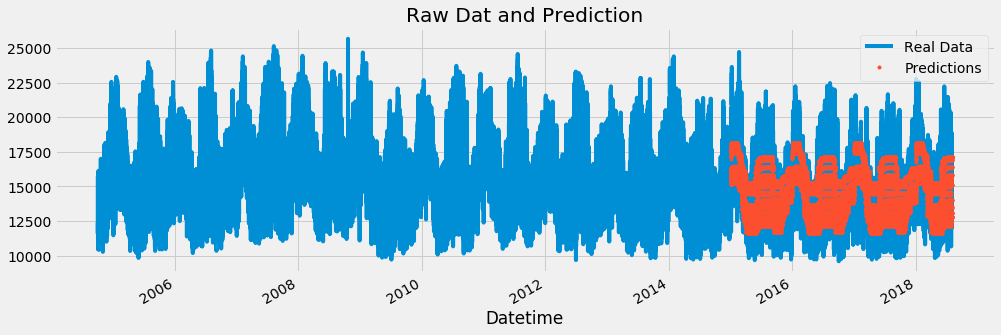

In [64]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['AEP_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Real Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

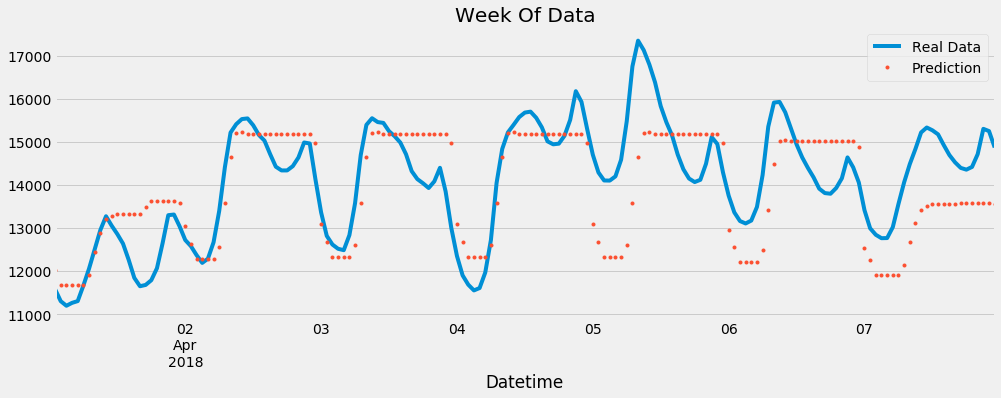

In [66]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['AEP_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Real Data','Prediction'])
plt.show()

## Score (RMSE)¶


In [69]:
score = np.sqrt(mean_squared_error(test['AEP_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 1649.06


## Calculate Error¶


# Look at the worst and best predicted days


In [72]:
test['error'] = np.abs(test[TARGET] - test['prediction'])


In [73]:
test['date'] = test.index.date


In [74]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2015-02-19    5654.247437
2015-02-20    5411.351929
2018-01-06    4804.675741
2015-01-08    4679.318441
2015-12-25    4468.430664
2015-02-16    4361.909505
2015-12-24    4198.218547
2018-01-05    4031.552287
2018-01-07    4022.536255
2015-02-15    4012.249471
Name: error, dtype: float64